## Курс "Нейронные сети и глубокое обучение"
### Лабораторная работа 2 - Полносвязная нейронная сеть
##### Группа 6231-010402D
##### Магистр Чаплыгин А.О.
##### Задание:
Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных CIFAR-10.

In [1]:
# INIT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# INNT Scripts
from scripts.classifiers.neural_net import TwoLayerNet
from scripts.gradient_check import eval_numerical_gradient
from scripts.vis_utils import visualize_grid
from tensorflow.keras.datasets import cifar10

In [3]:
# PARAMS
isRelease = False

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [5]:
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet.
Проверьте вашу реализацию на модельных данных.

In [6]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

In [7]:
if not isRelease : 
    TwoLayerNet.ping(net, 'Pong')
    
    print(f'TwoLayerNet: {net}')
    print(f'X: {X}')
    print(f'y: {y}')

Ping: Pong
TwoLayerNet: <scripts.classifiers.neural_net.TwoLayerNet object at 0x00000203EAB1ADA0>
X: [[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]
y: [0 1 2 2 1]


In [8]:
scores = net.loss(X)
print('Your scores:')
print(scores)

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]


# Прямой проход: вычисление выхода сети
Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных.
Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7).

In [9]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Прямой проход: вычисление loss
Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [10]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


In [11]:
loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Обучение нейронной сети на смоделированных данных
Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.

Final training loss:  0.01714364353292376


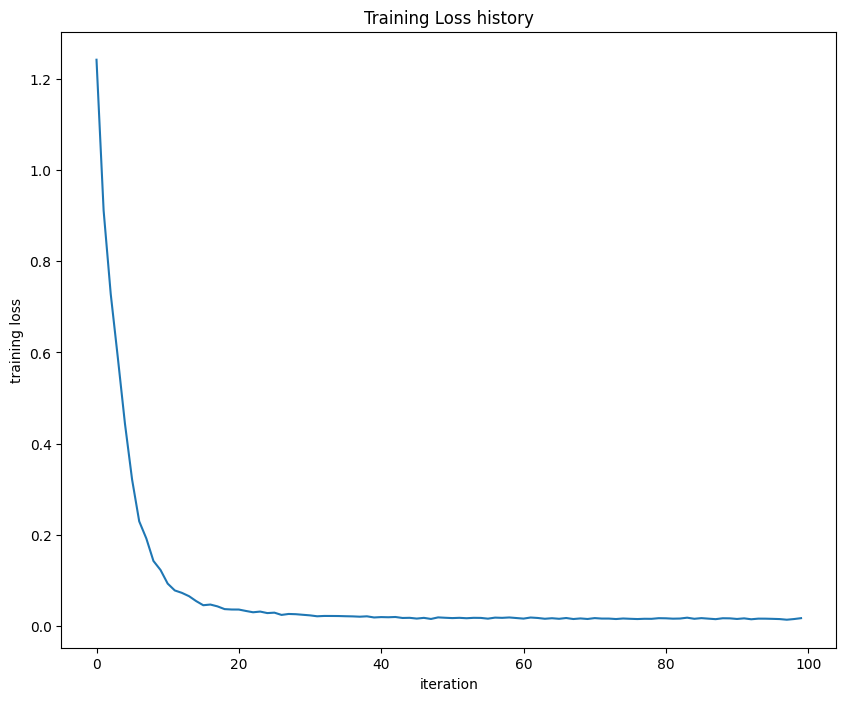

In [12]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)
Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [13]:
from tensorflow.keras.datasets import cifar10
cifar = cifar10.load_data()
# x - изображение, y - метки классов
(X_train, y_train), (X_test, y_test) = cifar
print (f'X_train, y_train - тренировочный набор данных')
print (f'')
print (f'X_train : uint8 Массив NumPy данных изображения в градациях серого с фигурами ({X_train.shape}), содержащий обучающие данные. Значения пикселей варьируются от 0 до 255.')
print (f'y_train : uint8 Массив меток NumPy (целые числа в диапазоне 0-9) с формой ({y_train.shape}) для обучающих данных.')
print (f'')
print (f'X_test : uint8 Массив NumPy данных изображения в градациях серого с фигурами ({X_test.shape}), содержащий тестовые данные. Значения пикселей варьируются от 0 до 255.')
print (f'y_test : uint8 Массив меток NumPy (целые числа в диапазоне 0-9) с формой ({y_test.shape}) для тестовых данных.')

num_training = 49000
num_validation = 1000
num_test = 10000
num_dev = 500

# Validation
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Training
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# Develop
mask = np.random.choice(num_training, num_dev, replace = False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Testing
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

y_train = np.reshape(y_train, (y_train.shape[0],))
y_val = np.reshape(y_val, (y_val.shape[0],))
y_test = np.reshape(y_test, (y_test.shape[0],))
y_dev = np.reshape(y_dev, (y_dev.shape[0],))

print ('')
print (f'Тренировочные данные: X = {X_train.shape}, Y = {y_train.shape[0]}')
print (f'Тестовая выборка: X = {X_test.shape}, Y = {y_test.shape[0]}')
print (f'Валидационная выборка: X = {X_val.shape}, Y = {y_val.shape[0]}')
print (f'Выборка для разработки: X = {X_dev.shape}, Y = {y_dev.shape[0]}')

X_train, y_train - тренировочный набор данных

X_train : uint8 Массив NumPy данных изображения в градациях серого с фигурами ((50000, 32, 32, 3)), содержащий обучающие данные. Значения пикселей варьируются от 0 до 255.
y_train : uint8 Массив меток NumPy (целые числа в диапазоне 0-9) с формой ((50000, 1)) для обучающих данных.

X_test : uint8 Массив NumPy данных изображения в градациях серого с фигурами ((10000, 32, 32, 3)), содержащий тестовые данные. Значения пикселей варьируются от 0 до 255.
y_test : uint8 Массив меток NumPy (целые числа в диапазоне 0-9) с формой ((10000, 1)) для тестовых данных.

Тренировочные данные: X = (49000, 3072), Y = 49000
Тестовая выборка: X = (10000, 3072), Y = 10000
Валидационная выборка: X = (1000, 3072), Y = 1000
Выборка для разработки: X = (500, 3072), Y = 500


#### Параметры обучения:
- num_iters - количество итераций (эпох) обучения
- batch_size - размер батча (подмножество из обучающего набора) для обучения
- learning_rate - параметр, указывающий на скорость обучения
- learning_rate_decay - параметр, уменьшающий скорость обучения после каждой эпохи
- reg - параметр регуляризации для настройки весов
- verbose - для вывода информации об обучении

#### C параметрами по умолчанию

In [14]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

In [15]:
net = TwoLayerNet(input_size, hidden_size, num_classes)
stats = net.train(X_train, y_train, X_val, y_val, verbose=True)
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 100: loss 2.302583
Validation accuracy:  0.142


#### Итеративное изменение параметров для получения accuracy, примерно равный 0.4.

In [20]:
stats = []
cnt = 0
acc = 0
last_acc = 0

Num_Iters=1000
Batch_Size=200
Reg=0.25

while (acc < 0.85) or (cnt >= 10):
    cnt = cnt + 1
        
    stats = []
    print(f'CNT: {cnt} | Num Iters: {Num_Iters} | Batch Size: {Batch_Size} | Reg: {Reg}')
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val, \
                      num_iters=Num_Iters, batch_size=Batch_Size, \
                      learning_rate=1e-4, learning_rate_decay=0.95, reg=Reg,\
                      verbose=True)
    val_acc = (net.predict(X_val) == y_val).mean()
    print(f'CNT: {cnt} | Validation accuracy: {val_acc}')
        
    if acc < val_acc :
        acc = val_acc
        if last_acc <= val_acc :
            Num_Iters = round(Num_Iters + (Num_Iters*0.75))
            Reg = Reg + (Reg*0.75)

            if Batch_Size > 50 :
                Batch_Size = round(Batch_Size - (Batch_Size*0.50))
            elif Batch_Size > 10 :
                Batch_Size = Batch_Size - 1
        else:
            break
        last_acc = val_acc

CNT: 1 | Num Iters: 1000 | Batch Size: 200 | Reg: 0.25
iteration 0 / 1000: loss 2.302766
iteration 100 / 1000: loss 2.299385
iteration 200 / 1000: loss 2.252571
iteration 300 / 1000: loss 2.128279
iteration 400 / 1000: loss 2.125851
iteration 500 / 1000: loss 2.021333
iteration 600 / 1000: loss 2.020602
iteration 700 / 1000: loss 1.998319
iteration 800 / 1000: loss 2.074988
iteration 900 / 1000: loss 2.004437
CNT: 1 | Validation accuracy: 0.317
CNT: 2 | Num Iters: 1750 | Batch Size: 100 | Reg: 0.4375
iteration 0 / 1750: loss 2.302922
iteration 100 / 1750: loss 2.300835
iteration 200 / 1750: loss 2.253315
iteration 300 / 1750: loss 2.152118
iteration 400 / 1750: loss 2.069050
iteration 500 / 1750: loss 2.134825
iteration 600 / 1750: loss 2.026440
iteration 700 / 1750: loss 2.017492
iteration 800 / 1750: loss 1.994209
iteration 900 / 1750: loss 1.939974
iteration 1000 / 1750: loss 1.932132
iteration 1100 / 1750: loss 1.994013
iteration 1200 / 1750: loss 1.891543
iteration 1300 / 1750: lo

Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

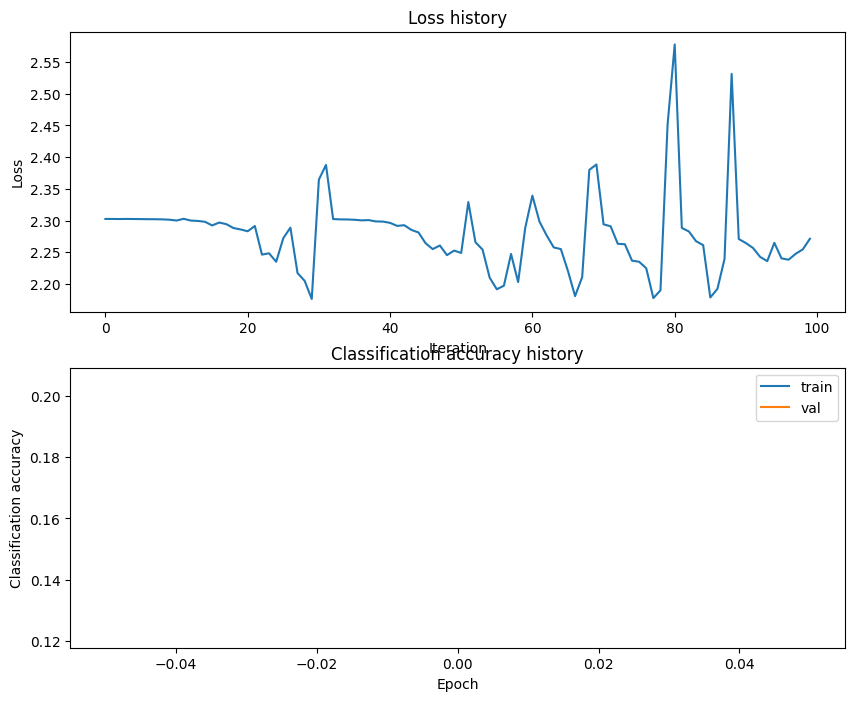

In [17]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()
# Графиечек не вышел у меня

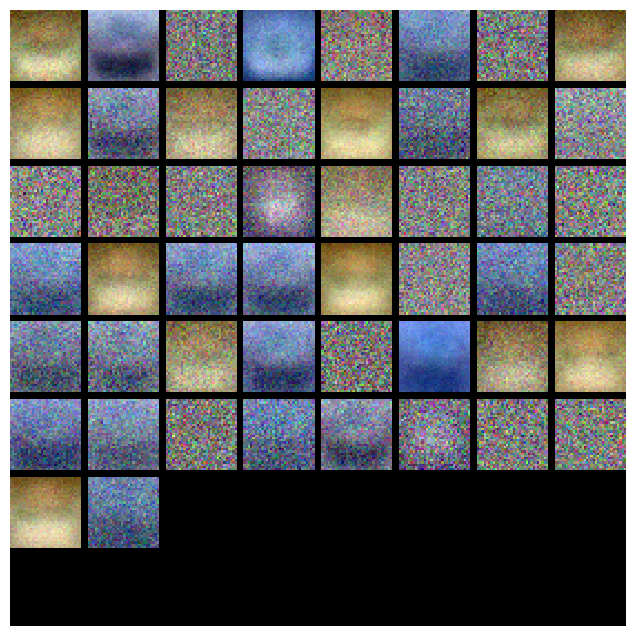

In [18]:
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

Сделайте выводы по результатам работы. 

Была реализована двуслойная полносвязная нейронная сеть и алгоритм ее обучения.</br>
Точность при обучении возможно повысить следующими действиями:</br>
- увеличить количество эпох, но при определенной эпохе может начаться переобучение
- уменьшить размера батча
- измененить параметр регуляризации для настройки весов